# Clustering and PCA – California Housing Dataset

This notebook:
- Applies KMeans clustering
- Uses the elbow method to determine number of clusters
- Reduces dimensions using PCA
- Visualizes clustered housing regions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop("MedHouseVal", axis=1)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

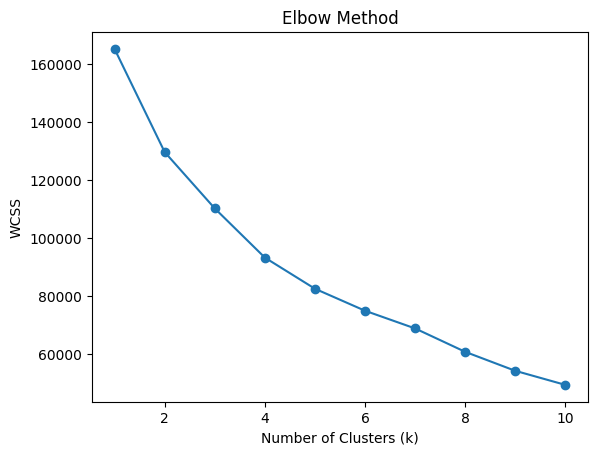

In [5]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_scaled)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.25336868 0.23516245]


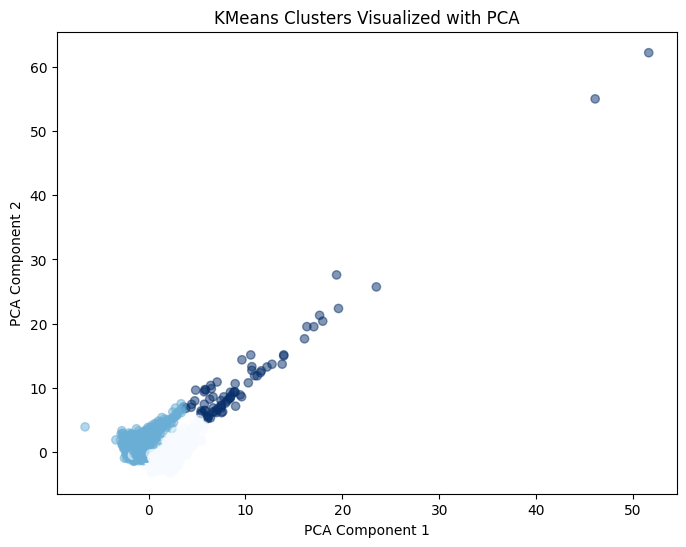

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    cmap='Blues',
    alpha=0.5
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.show()

In [10]:
df["Cluster"] = clusters
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0
